In [1]:
import util

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
sns.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')


## Read the data


In [2]:
df = pd.read_csv('../data/train_data.csv')
# create a new column called weightOverHeightSquared
df['weightOverHeightSquared'] = df['Weight'] / df['Height'] ** 2

numerical_features = ['Weight', 'Height', 'Age', 'Meal_Count',
                      'Phys_Act', 'Water_Consump', 'weightOverHeightSquared']
categorical_features = ['Smoking', 'Alcohol_Consump', 'Transport']
target = 'Body_Level'

df = df[numerical_features + categorical_features + [target]]


## Explore the features


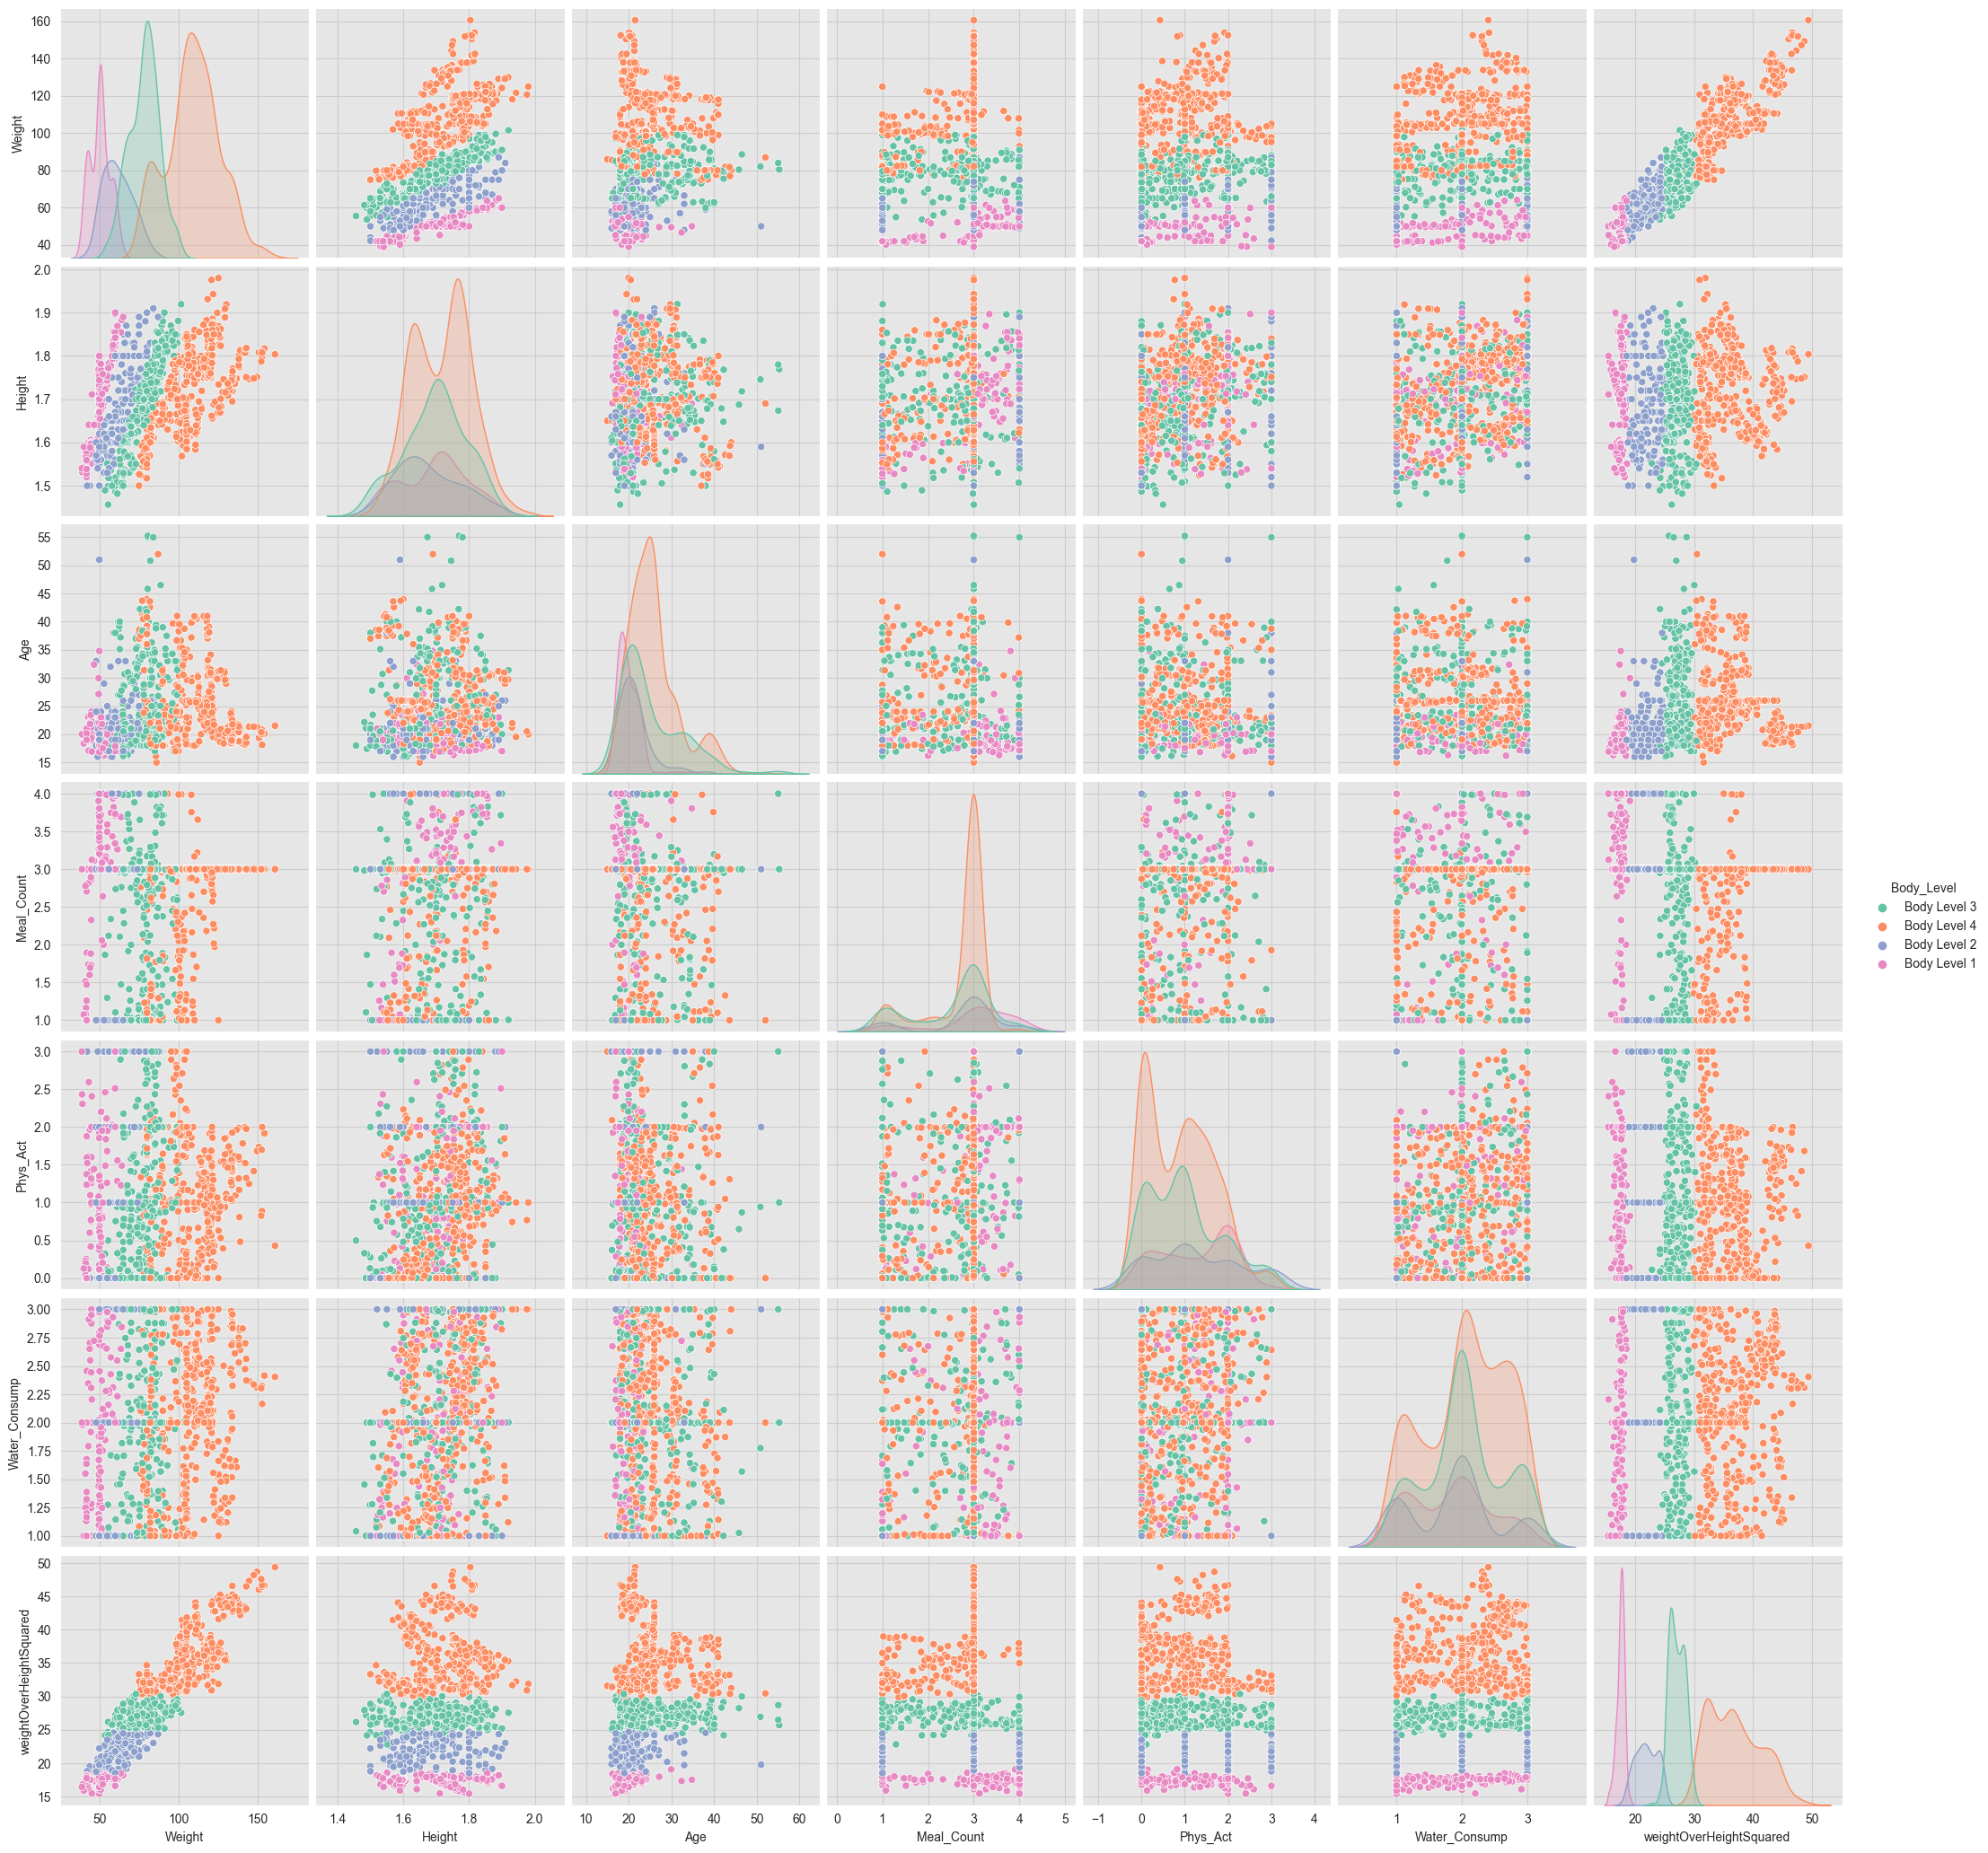

In [3]:
features = numerical_features + categorical_features
# relationship between features
sns.pairplot(df[numerical_features + categorical_features + [target]],
             hue=target, palette='Set2', diag_kind='kde', height=3)
plt.savefig('../figures/ThresholdClassifier/features_target.png',
            dpi=1000, bbox_inches='tight')
plt.show()


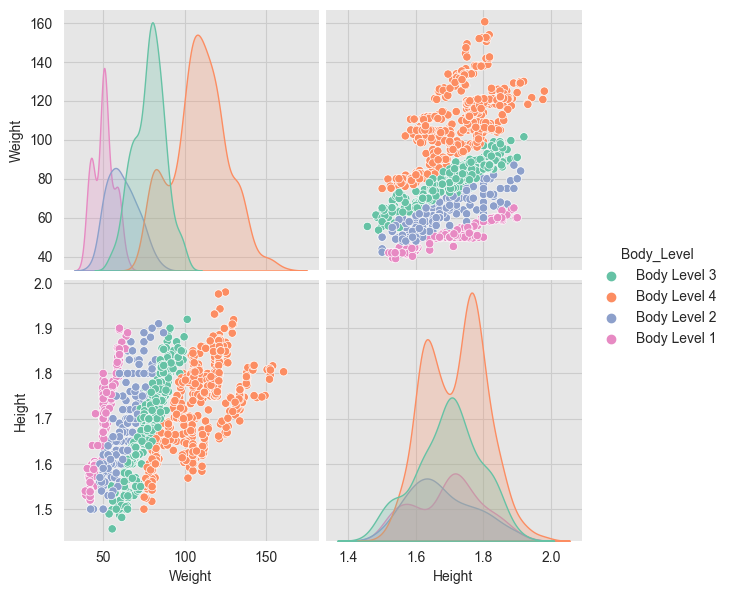

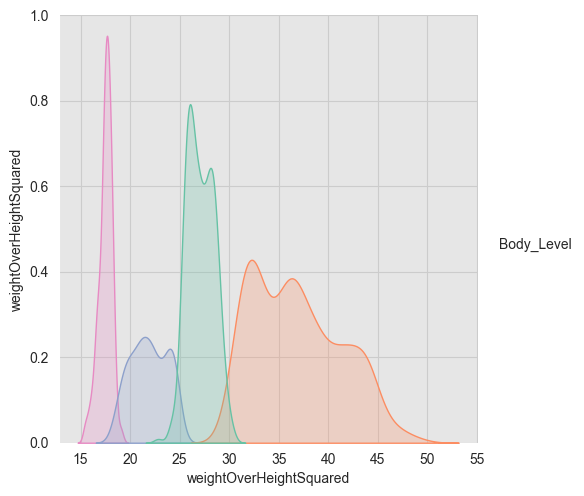

In [4]:
# relationship between features
sns.pairplot(df[['Weight', 'Height', 'Body_Level']], hue=target,
             palette='Set2', diag_kind='kde', height=3)
plt.savefig('../figures/ThresholdClassifier/w_H_target.png',
            dpi=1000, bbox_inches='tight')
plt.show()

# show the distribution of the weightOverHeightSquared feature with respect to the target
sns.pairplot(df[['weightOverHeightSquared', 'Body_Level']],
             hue=target, palette='Set2', diag_kind='kde', height=5)
plt.savefig('../figures/ThresholdClassifier/WH_target.png',
            dpi=1000, bbox_inches='tight')
plt.show()


Body_Level
Body Level 1    17.481547
Body Level 2    21.879882
Body Level 3    27.068681
Body Level 4    36.854733
Name: weightOverHeightSquared, dtype: float64
Body_Level
Body Level 1    17.578549
Body Level 2    21.801897
Body Level 3    26.989619
Body Level 4    36.320332
Name: weightOverHeightSquared, dtype: float64
Body_Level
Body Level 1    15.432099
Body Level 2    18.518519
Body Level 3    22.826739
Body Level 4    29.911958
Name: weightOverHeightSquared, dtype: float64


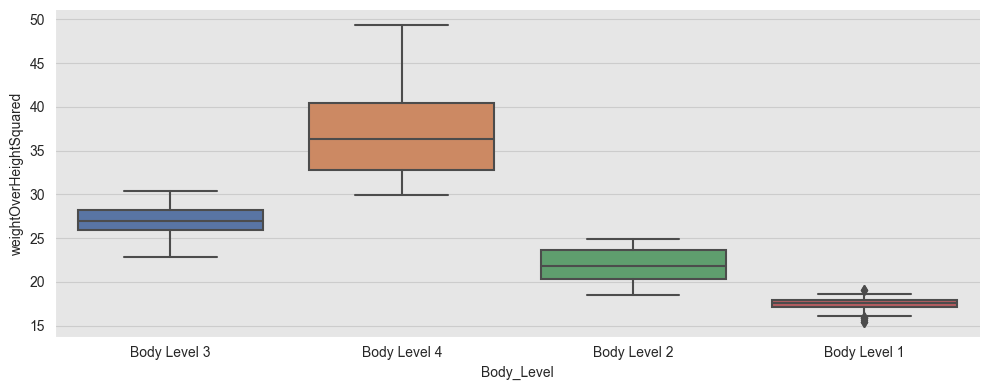

In [5]:

# Show a graph of the relationship between bode level and weightOverHeight
sns.catplot(x='Body_Level', y='weightOverHeightSquared',
            data=df, kind='box', height=4, aspect=2.5)

# save the figure
plt.savefig('../figures/ThresholdClassifier/WH_target_catplot.png',
            dpi=1000, bbox_inches='tight')
# print the mean of weightOverHeightSquared for each body level
print(df.groupby('Body_Level')['weightOverHeightSquared'].mean())
print(df.groupby('Body_Level')['weightOverHeightSquared'].median())
print(df.groupby('Body_Level')['weightOverHeightSquared'].min())


## Read the data


In [6]:
# Read the train data
X, y = util.getData(path='../data/train_data.csv', scaleNumericalFeatures=True)

# X = X[['Weight', 'Height']]

# Read the test data
X_test, y_test = util.getData(
    path='../data/train_data.csv', scaleNumericalFeatures=True)

# X_test = X_test[['Weight', 'Height']]

# concatenate the train and test data
X = pd.concat([X, X_test])
y = pd.concat([y, y_test])

# create a new column called weightOverHeightSquared
X['weightOverHeightSquared'] = X['Weight'] / X['Height'] ** 2

# Use the weightOverHeightSquared feature only
X = X[['weightOverHeightSquared']]


## Conclusions

From the previous data exploration, we noticed that the data follows a certain equation. We undergone some research and found that it follows what is called a BMI(Body Mass Index) equation. The equation is as follows: $$BMI = \frac{weight}{height^2}$$

| Body Level  | Threshold |                                                     Health Implication                                                      |
| :---------: | :-------: | :-------------------------------------------------------------------------------------------------------------------------: |
| Underweight |   <18.5   |                     Increased risk of health problems such as osteoporosis, heart disease, and diabetes                     |
|   Normal    | 18.5-24.9 |                                                     Healthy body weight                                                     |
| Overweight  |  25-29.9  |        Increased risk of health problems such as heart disease, stroke, type 2 diabetes, and certain types of cancer        |
|   Obesity   |    30<    | Significantly increased risk of health problems such as heart disease, stroke, type 2 diabetes, and certain types of cancer |


## Create a model


In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np


class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, threshold=[18, 22, 30]):
        self.threshold = threshold

    def fit(self, X, y):
        pass

    def predict(self, X):
        # convert x to numpy array
        X = np.array(X)
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if X[i][0] < self.threshold[0]:
                y_pred[i] = 0
            elif X[i][0] < self.threshold[1]:
                y_pred[i] = 1
            elif X[i][0] < self.threshold[2]:
                y_pred[i] = 2
            else:
                y_pred[i] = 3
        return y_pred


## Evaluate the model


In [8]:
# Use the global BMI thresholds
globalThresholds = [18.5, 24.9, 29.9]

# calc the min value of weightOverHeightSquared for each body level
minVal = df.groupby('Body_Level')['weightOverHeightSquared'].min().tolist()
print(minVal)

# calc the 25th percentile of weightOverHeightSquared for each body level
q25 = df.groupby('Body_Level')[
    'weightOverHeightSquared'].quantile(0.25).tolist()
print(q25)

# calc the mean value of weightOverHeightSquared for each body level
meanVal = df.groupby('Body_Level')['weightOverHeightSquared'].mean().tolist()
print(meanVal)

# create a list of thresholds
thresholds = minVal[1:]
# create a pipeline with the custom classifier
clf = ThresholdClassifier(globalThresholds)

# predict the body level
y_pred = clf.predict(X[['weightOverHeightSquared']])

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1 score:", f1)


[15.432098765432098, 18.51851851851852, 22.826738618008303, 29.911958308167144]
[17.16600909125834, 20.319814650166933, 25.961436275712682, 32.7695008370817]
[17.481547475205552, 21.87988177486076, 27.068680864424195, 36.85473300635413]
Accuracy: 0.1693480101608806
F1 score: 0.09768666475902209
